<a href="https://colab.research.google.com/github/pvjaswanth/RKTECH/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

len(x_train)

11490434/11490434 [==============================] - 0s 0us/step


60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

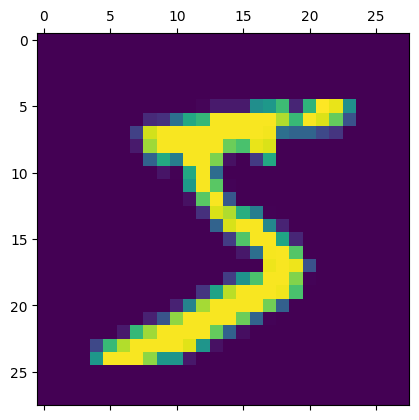

In [7]:
plt.matshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train = x_train / 255
x_test = x_test / 255

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [14]:
x_train_flattened.shape

(60000, 784)

In [15]:
x_train_flattened.shape

(60000, 784)

In [16]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4638 - accuracy: 0.8800
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3034 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2829 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9258


In [17]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2674 - accuracy: 0.9246


[0.26742008328437805, 0.9246000051498413]

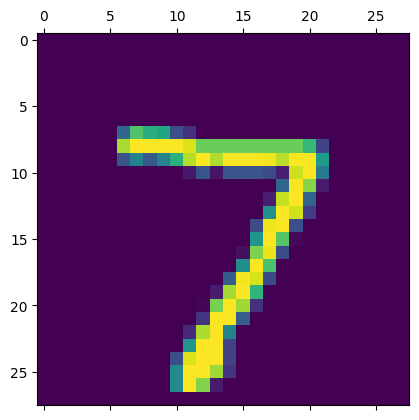

In [18]:
plt.matshow(x_test[0])

In [19]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([2.0161618e-02, 1.9929658e-07, 4.2035218e-02, 9.4860291e-01,
       3.0408115e-03, 7.2063632e-02, 9.4888236e-07, 9.9975747e-01,
       5.8864232e-02, 5.9082395e-01], dtype=float32)

In [20]:
np.argmax(y_predicted[0])

7

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    5,    2,    1,    1],
       [   0, 1106,    5,    2,    1,    1,    4,    2,   14,    0],
       [   4,    6,  945,   13,   10,    2,   11,   10,   27,    4],
       [   4,    0,   23,  921,    2,   21,    1,   11,   18,    9],
       [   1,    1,    6,    1,  927,    0,    6,    4,    7,   29],
       [  11,    2,    8,   39,   12,  762,   11,    9,   30,    8],
       [  13,    3,    7,    1,    8,   14,  908,    2,    2,    0],
       [   1,    5,   24,    4,   10,    0,    0,  948,    2,   34],
       [   8,    7,   11,   22,   10,   21,   10,   12,  861,   12],
       [  10,    6,    2,   12,   36,    5,    0,   27,    6,  905]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

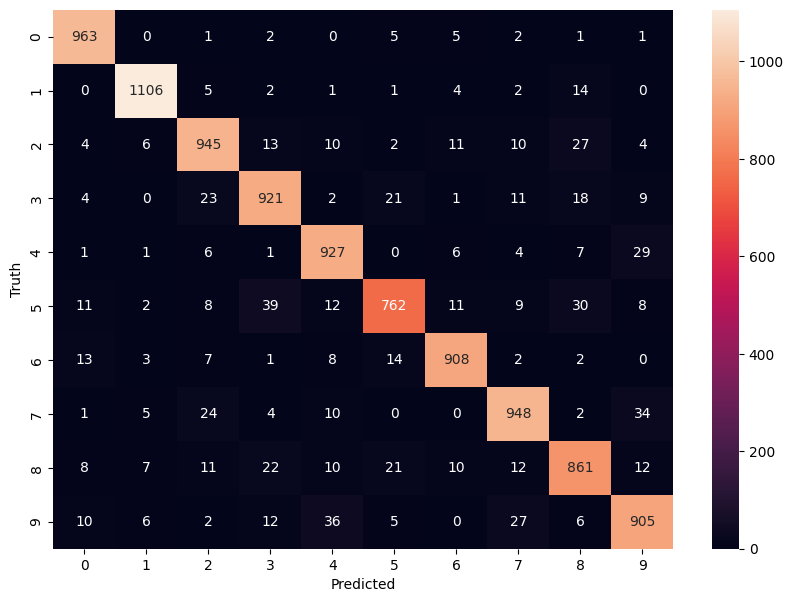

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
# Sequential create a stack of layers
# Create a hidden layer with 100 neurons and relu activation
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2719 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1233 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0860 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0520 - accuracy: 0.9842


In [25]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0780 - accuracy: 0.9757


[0.07801242917776108, 0.9757000207901001]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

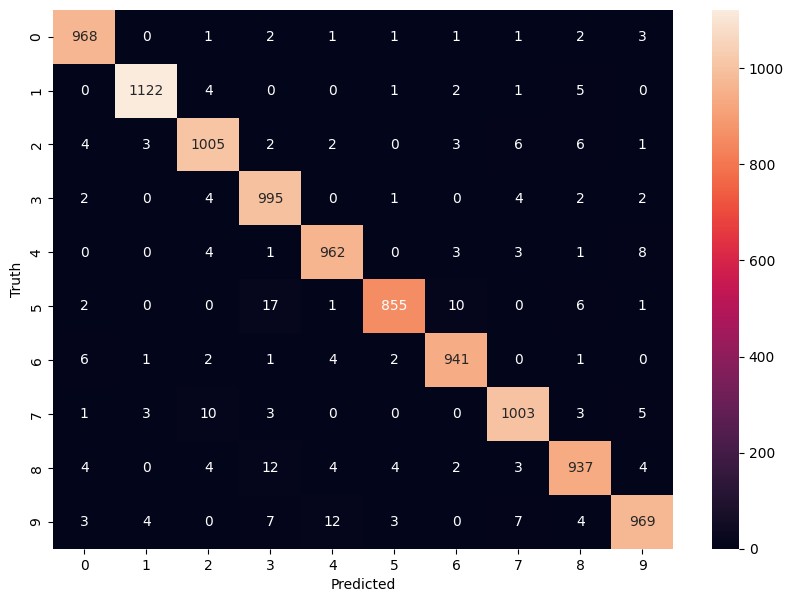

In [26]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [31]:
x_train_flattened = x_train.reshape((60000, 28, 28))

In [32]:
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2688 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1236 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0882 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0675 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0513 - accuracy: 0.9840
